In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Analysis

## Dataset1 - box office dataset

In [6]:
#load and study the dataset
df = pd.read_csv('D:\MORINGA\Project_2\Group4-Phase2-Project\zippedData\cleaned_dataset_box_office.csv')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 131.2+ KB


,title,studio,domestic_gross,foreign_gross,year
0,toy story 3 (2010),bv,415000000.0,652000000.0,2010
1,alice in wonderland (2010) (2010),bv,334200000.0,691300000.0,2010
2,harry potter and the deathly hallows part 1 (2...,wb,296000000.0,664300000.0,2010
3,inception (2010),wb,292600000.0,535700000.0,2010
4,shrek forever after (2010),p/dw,238700000.0,513900000.0,2010


#### To check for skewness in the data we will plot an histogram with a KDE(Kernel density estimation)

c:\Users\Mannu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mannu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


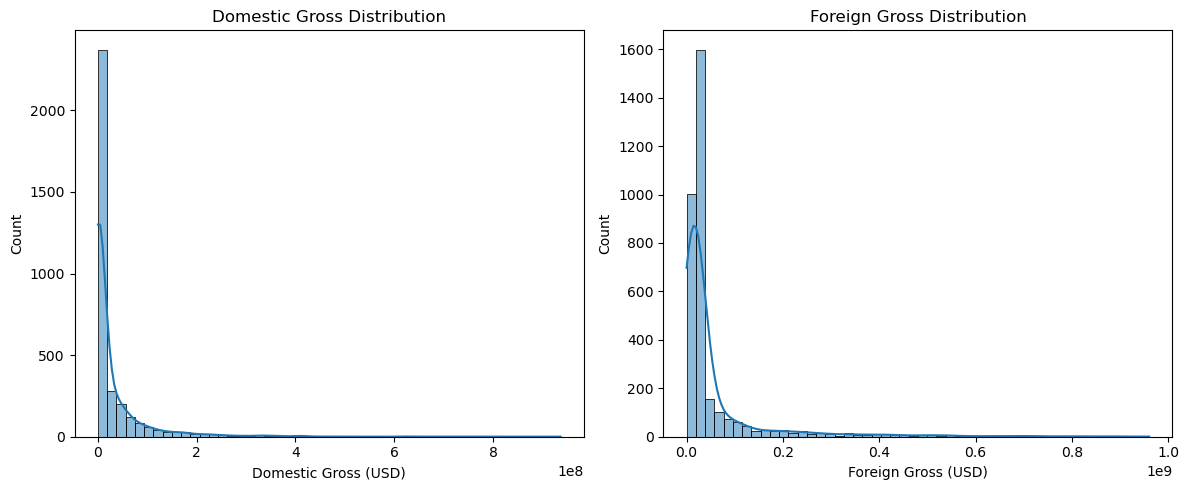

In [7]:
#Distribution of Domestic and Foreign Gross Earnings
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['domestic_gross'], bins=50, kde=True)
plt.title('Domestic Gross Distribution')
plt.xlabel('Domestic Gross (USD)')

plt.subplot(1, 2, 2)
sns.histplot(df['foreign_gross'], bins=50, kde=True)
plt.title('Foreign Gross Distribution')
plt.xlabel('Foreign Gross (USD)')

plt.tight_layout()
plt.show()


## Interpretation - Domestic gross
- A small number of blockbuster movies earned hundreds of millions, but most films earned modest amounts.

- There is high variance, which means that movie performance varies wildly.

- Outliers (e.g., > $500 million) distort the average—mean is much higher than the median

## Conclusion
- The foreign gross histogram is slightly more spread out, with more movies earning moderately high amounts.Suggests international audiences are contributing more consistently across many films than domestic audiences.
- Because foreign earnings are more evenly distributed, a film that underperforms domestically may still recover or profit internationally.This offers a strategic hedge for new studios—target international viability from the outset.

## Recommendation
- Don’t rely on domestic earnings alone—build strategies that include global box office potential.

- Develop content with universal themes (action, adventure, family, fantasy), which tend to perform well internationally.

- Invest in foreign distribution partnerships, multilingual releases, and localized marketing.

- Given the distribution shape, plan for a portfolio approach: fund multiple mid-budget films rather than one high-risk blockbuster.



In [8]:
# Correlation Analysis: Domestic vs. Foreign Gross
correlation = df['domestic_gross'].corr(df['foreign_gross'])
print("\nCorrelation between domestic and foreign gross:", correlation)


Correlation between domestic and foreign gross: 0.7835191549774785


#### The correlation co-efficieint is 0.7835191549774785, which indicates its moderately strong positive relationship. This means that if a movie performs well locally it's likely to perform internationally as well.

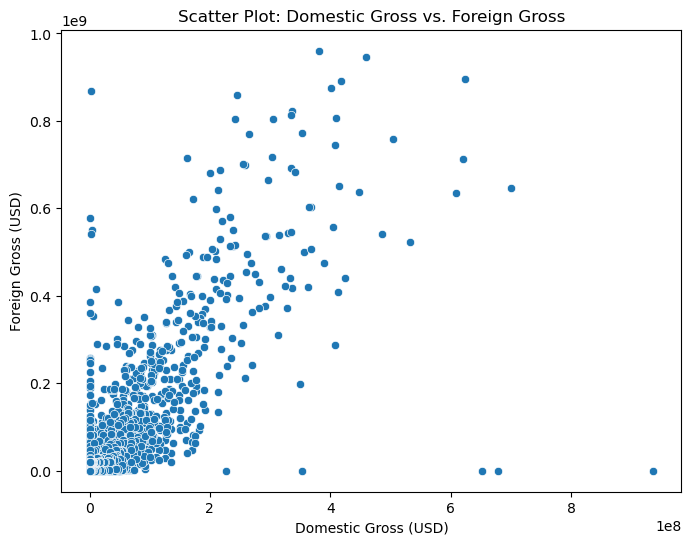

In [9]:
# Visualize correlation with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='domestic_gross', y='foreign_gross', data=df)
plt.title('Scatter Plot: Domestic Gross vs. Foreign Gross')
plt.xlabel('Domestic Gross (USD)')
plt.ylabel('Foreign Gross (USD)')
plt.show()

## Interpretation
- Most points are clustered near the origin (lower left), showing that the majority of movies earn relatively low in both markets.
- There's no perfect linear line, but a clear diagonal pattern suggests a moderately strong linear relationship.

## Recommendation
- Invest in strong domestic launches—but ensure the movie is globally accessible to amplify success abroad.
- A film that earns modestly in the U.S. may still be profitable globally, especially with proper localization.

In [10]:
#Studio-wise Performance: Aggregate total gross by studio
studio_summary = df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum().reset_index()
studio_summary['total_gross'] = studio_summary['domestic_gross'] + studio_summary['foreign_gross']
# Display top 10 studios by total gross
top_studios = studio_summary.sort_values(by='total_gross', ascending=False).head(10)
print("\nTop 10 Studios by Total Gross:")
print(top_studios)


Top 10 Studios by Total Gross:
      studio  domestic_gross  foreign_gross   total_gross
37        bv    1.841903e+10   2.583265e+10  4.425168e+10
90       fox    1.094950e+10   2.009467e+10  3.104417e+10
244       wb    1.216805e+10   1.886190e+10  3.102995e+10
234     uni.    1.290239e+10   1.691297e+10  2.981536e+10
210     sony    8.459683e+09   1.402284e+10  2.248252e+10
176     par.    7.685871e+09   1.199918e+10  1.968506e+10
245  wb (nl)    3.995700e+09   6.358400e+09  1.035410e+10
134      lgf    4.118963e+09   4.766619e+09  8.885583e+09
133     lg/s    2.078200e+09   3.431324e+09  5.509524e+09
170     p/dw    1.682900e+09   3.393600e+09  5.076500e+09


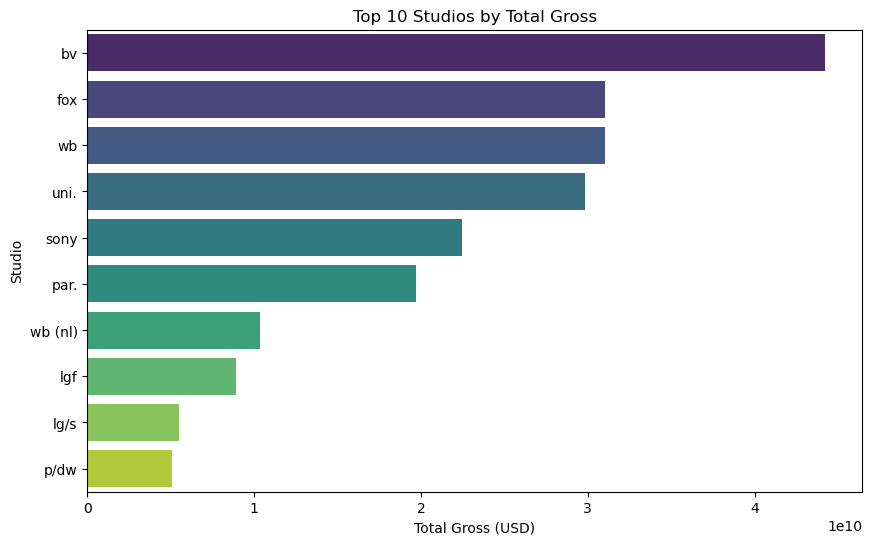

In [11]:
# Plot top 10 studios performance
plt.figure(figsize=(10, 6))
sns.barplot(x='total_gross', y='studio', data=top_studios, palette='viridis')
plt.title('Top 10 Studios by Total Gross')
plt.xlabel('Total Gross (USD)')
plt.ylabel('Studio')
plt.show()


## Interpretation
- A few studios male significantly more than others
- The top 10 are not evenly matched—revenue is heavily concentrated among the top players.

## Recommendation 
- Avoid Direct Competition with top 3–5 studios; they dominate due to scale, brand loyalty, and franchis
- Build Relationships with Foreign Distributors—international expansion can be a major revenue stream.

In [12]:
#Yearly Trend Analysis: Mean gross per year
yearly_trends = df.groupby('year')[['domestic_gross', 'foreign_gross']].mean().reset_index()
yearly_trends['total_mean_gross'] = yearly_trends['domestic_gross'] + yearly_trends['foreign_gross']

print("\nYearly Trends (Average Gross):")
print(yearly_trends)


Yearly Trends (Average Gross):
   year  domestic_gross  foreign_gross  total_mean_gross
0  2010    3.154295e+07   4.546885e+07      7.701180e+07
1  2011    2.541436e+07   4.474562e+07      7.015999e+07
2  2012    2.767584e+07   5.066917e+07      7.834502e+07
3  2013    3.128212e+07   5.621230e+07      8.749441e+07
4  2014    2.650700e+07   5.123864e+07      7.774564e+07
5  2015    2.461338e+07   4.494200e+07      6.955537e+07
6  2016    2.598996e+07   5.463462e+07      8.062458e+07
7  2017    3.416646e+07   7.094729e+07      1.051137e+08
8  2018    3.601042e+07   6.523861e+07      1.012490e+08


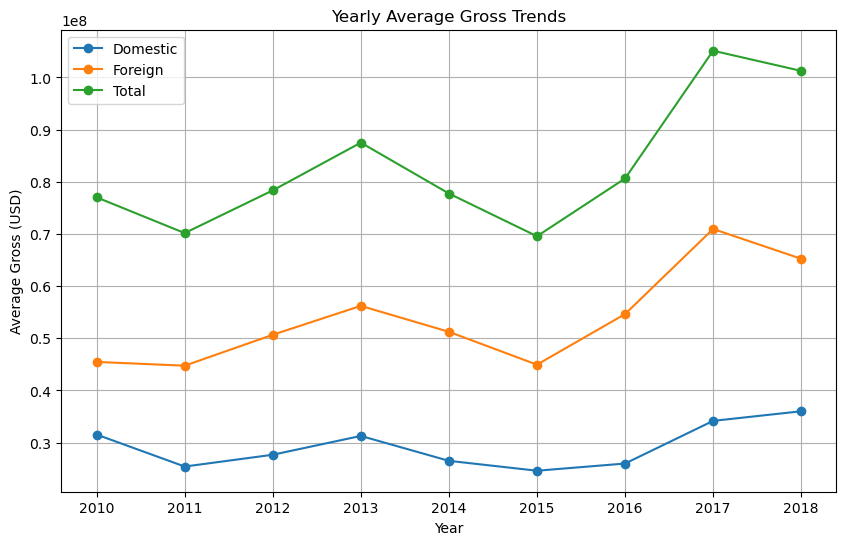

In [13]:
# Plot yearly trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['year'], yearly_trends['domestic_gross'], marker='o', label='Domestic')
plt.plot(yearly_trends['year'], yearly_trends['foreign_gross'], marker='o', label='Foreign')
plt.plot(yearly_trends['year'], yearly_trends['total_mean_gross'], marker='o', label='Total')
plt.title('Yearly Average Gross Trends')
plt.xlabel('Year')
plt.ylabel('Average Gross (USD)')
plt.legend()
plt.grid(True)
plt.show()


## Interpretation of Results
- The foreign gross curve is consistently higher than domestic after 2010. Indicates the international audience is now more critical to a movie’s success than ever before.
- Domestic mean gross shows a stagnant or slightly declining trend in recent years. Suggests the U.S. market may be saturated, with limited new audience growth.
- Peaks often coincide with blockbuster-heavy years (e.g., years when Star Wars, Marvel, or animated hits released).This reflects how a few films can skew yearly averages, reinforcing the industry's hit-driven nature

## Recommendation 
- With volatile yearly averages, it’s safer to produce a variety of mid-tier films rather than depending on one big title each year.
- If historical data shows certain years (or seasons) perform better, time releases strategically to align with industry momentum.

## Dataset 2 - film_df.csv

In [14]:
#loading the cleaned dataset for film analysis
df1 = pd.read_csv('D:\MORINGA\Project_2\Group4-Phase2-Project\zippedData\cleaned_dataset_film_df.csv')
df1.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"biography,drama",7.2,43
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,drama,6.9,4517
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,91.0,"comedy,drama",6.1,13
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"comedy,drama,fantasy",6.5,119


### From the data the columns that we will major on are, runtime_minutes, averagerating, numvotes

In [15]:
# summary statistics for the important columns
df1[['averagerating', 'numvotes', 'runtime_minutes']].describe()

,averagerating,numvotes,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000
mean,6.332729,3.523662e+03,94.277039
std,1.474978,3.029402e+04,197.524557
min,1.000000,5.000000e+00,3.000000
25%,5.500000,1.400000e+01,83.000000
50%,6.500000,4.900000e+01,91.000000
75%,7.400000,2.820000e+02,101.000000
max,10.000000,1.841066e+06,51420.000000


## Interpretation
- Average Rating (6.33): 

Most films hover around a mid-level rating. Median (6.5) is higher than mean → slightly left-skewed (a few very low-rated films).

- Number of Votes (Highly Skewed):

The mean is much higher than the median due to a few extremely popular films.

Most films get fewer than 100 votes, but a handful receive millions, strongly skewing the average.

- Runtime:

The mean runtime is around 94 minutes, which is typical.

However, max runtime of 51,420 minutes is likely a data anomaly.

Median runtime (91 minutes) is more reliable; most films fall in the 80–100 minute range.

## Recommendations Based
- Target Ratings in the 7.0–8.0 Range
Films with above-average ratings tend to benefit from better longevity and audience retention. Quality storytelling is a major asset.

- Focus on Reach and Visibility
Since most films have few votes, invest in promotion, visibility, and engagement to move your movie into higher visibility brackets (which correlate with better vote counts and revenue).

- Optimize Runtime Around 90–100 Minutes
This range is the industry sweet spot. Longer runtimes may hurt engagement unless justified by genre

## Dataset 3 - movie_budget.csv

In [18]:
df2 = pd.read_csv("D:\MORINGA\Project_2\Group4-Phase2-Project\zippedData\cleaned_dataset_movie_budget.csv")
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"may 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"may 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
#inspect and clean the dataset
df2_cleaned = df2[['production_budget', 'worldwide_gross']].dropna()
df2['release_date'] = pd.to_datetime(df2['release_date'])
# df2_cleaned = df2[(df2['production_budget'] > 0) & (df2['worldwide_gross'] > 0)]
def clean_currency(column):
    return pd.to_numeric(column.replace('[\$,]', '', regex=True), errors='coerce')

# Apply to each column
df2['production_budget'] = clean_currency(df2['production_budget'])
df2['domestic_gross'] = clean_currency(df2['domestic_gross'])
df2['worldwide_gross'] = clean_currency(df2['worldwide_gross'])
df2_cleaned = df2.replace('$', '')
df2_cleaned.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [28]:
df2_cleaned.to_csv('D:\MORINGA\Project_2\Group4-Phase2-Project\zippedData\cleaned_dataset2_movie_budget.csv', index=False)

In [30]:
df2_cleaned.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,2004-07-06 05:20:31.546177792,3.158776e+07,4.187333e+07,9.148746e+07
min,1.000000,1915-02-08 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,2000-04-22 18:00:00,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,2007-03-02 00:00:00,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,2012-12-25 00:00:00,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,2020-12-31 00:00:00,4.250000e+08,9.366622e+08,2.776345e+09
std,28.821076,NaN,4.181208e+07,6.824060e+07,1.747200e+08


## Insights from the summary statistics
Average production budget: ~$31.6 million.

Average domestic gross: ~$41.9 million.

Average worldwide gross: ~$91.5 million.

Some movies earned nothing (domestically or globally).

Production budgets range from $1,100 to $425 million.

## Let's now visualize and look for patterns:

    - Distribution of production budgets and earnings

    - Relationship between production budget and gross

    - Temporal trends (gross over time)

c:\Users\Mannu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


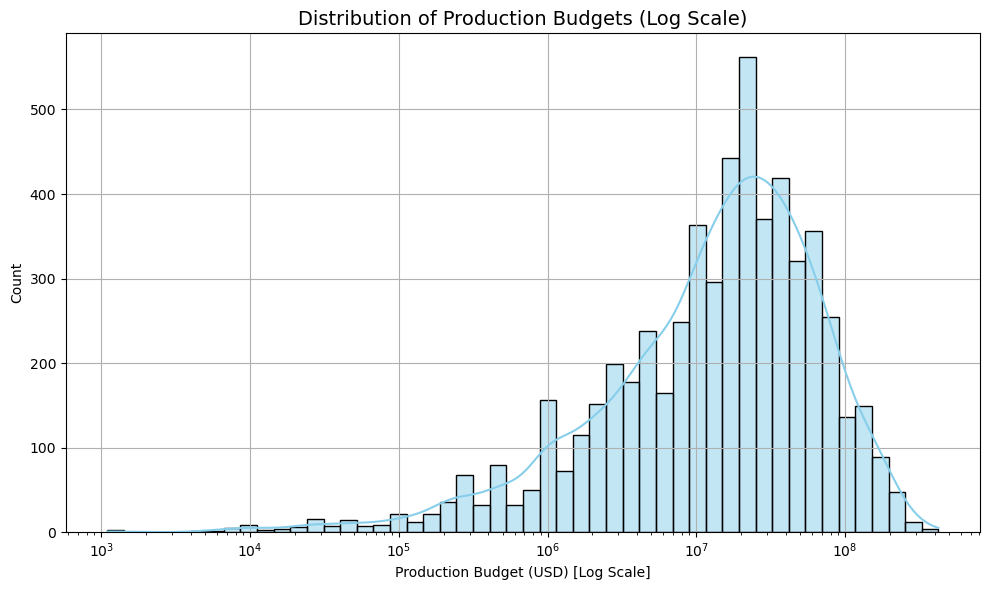

In [34]:
#Distribution of Production Budget 
plt.figure(figsize=(10, 6))
sns.histplot(df2_cleaned['production_budget'], bins=50, kde=True, log_scale=(True, False), color='skyblue')
plt.title('Distribution of Production Budgets (Log Scale)', fontsize=14)
plt.xlabel('Production Budget (USD) [Log Scale]')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion:

- Distribution Shape: The production budget data is right-skewed (positively skewed), meaning:

        Most films have lower to moderate budgets, typically clustered below $100 million.

        A few films have extremely high budgets (blockbusters), which act as outliers.

- Range & Spread: There is a wide range in production budgets—from a few million dollars to over $300 million, indicating a diverse industry with both indie and big-studio productions.

## Recommendation
- Avoid allocating high budgets unless backed by data-driven projections on genre popularity, cast appeal, and franchise strength.
- Low-budget films (e.g., <$20M) may be suitable for niche markets or streaming platforms.
- Mid-budget films (e.g., $20M–$100M) offer balanced risk-return potential.
- High-budget films (>$100M) should be backed by strong marketing, wide release, and ideally franchise support.

C:\Users\Mannu\AppData\Local\Temp\ipykernel_8316\419547140.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


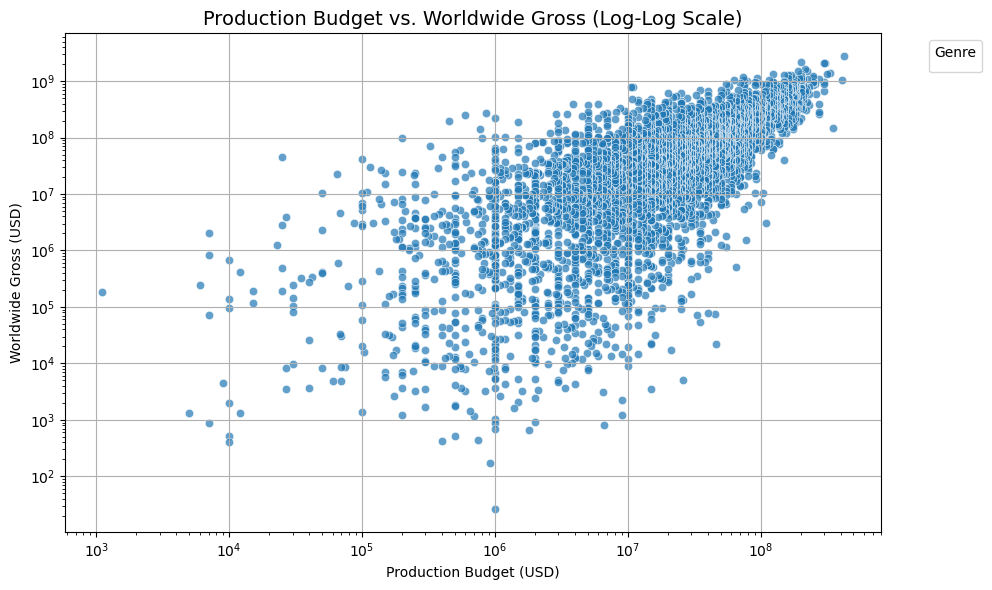

In [37]:
#Production budget vs. Worldwide Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='production_budget',
    y='worldwide_gross',
    data=df2_cleaned,
    # hue='Genre',  # Optional: remove if Genre not available
    palette='Set2',
    alpha=0.7
)
plt.xscale('log')
plt.yscale('log')
plt.title('Production Budget vs. Worldwide Gross (Log-Log Scale)', fontsize=14)
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

#### The scatter plot above shows the positive trend between production budget and worldwide gross. Higher budgets generally correlate with higher earnings.

## Conclusion:
- There is a moderate to strong positive correlation between production budget and worldwide gross. This means: Higher-budget films tend to earn more globally, which is expected given their broader marketing, star power, and production quality.

## Recommendations:
- Invest more heavily in genres and franchises with proven global appeal (e.g., action, sci-fi, superheroes).
- Avoid allocating blockbuster-level budgets to experimental or niche genres unless supported by data.
- Combine a few high-budget “tentpole” films with multiple mid-to-low-budget projects, reducing risk while maintaining revenue potential.

## Overall Business Recommendation based on statistical analysis
-  Prioritize Quality: Target Ratings Above 7.0, Most films cluster between 6.0 and 7.0. Breaking into the 7+ range significantly improves visibility, longevity, and audience trust. Invest in screenwriting, directing, and post-production—audiences reward polish.
- Invest in Global Marketing: Since worldwide gross includes international earnings, investing in localized promotion and distribution partnerships can maximize returns.
- Stick to the Optimal Runtime (90–120 Minutes). The majority of successful films are around 1.5 hours long. Extremely short or long runtimes tend to underperform or signal experimental cinema.
- Choose Genres with Strategic Purpose. Action, Animation, and Sci-Fi often perform better globally. Drama and Indie genres do well with awards but may have niche appeal.